In [26]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [14]:
# Given values
x_values = np.array([1, 2, 3, 4, 5])
Y_values = np.array([3, 4, 2, 4, 5])


In [17]:
# Calculate means
mean_x_values = np.mean(x_values)
mean_Y_values = np.mean(Y_values)
print(f"The slope is: {mean_x_values}")
print(f"The slope is: {mean_Y_values}")

The slope is: 3.0
The slope is: 3.6


In [16]:
# Calculate numerator and denominator for the slope
numerator = np.sum((x_values - mean_x_values) * (Y_values - mean_Y_values))
denominator = np.sum((x_values - mean_x_values) ** 2)

In [18]:
slope = numerator / denominator
print(f"The slope is: {slope}")

The slope is: 0.4


In [22]:
intercept = mean_Y_values - slope * mean_x_values
print("Intercept (c):", intercept)

Intercept (c): 2.4


In [29]:
print(f"y = {slope:.2f}x + {intercept:.2f}")

y = 0.40x + 2.40


In [30]:
def predict(x_values):
    yp = []
    for i in range(len(x_values)):
        yp.append(slope * x_values[i] + intercept)  # Corrected typo here
    return yp

# Using the predict function with your x_values
y_p = predict(x_values)
print(y_p)


[2.8, 3.2, 3.6, 4.0, 4.4]


In [35]:
# Calculate the residual sum of squares (RSS)
rss = np.sum((Y_values - y_p) ** 2)

# Calculate the total sum of squares (TSS)
tss = np.sum((Y_values - mean_Y_values) ** 2)

# Calculate R-squared (R²)
r2 = 1 - (rss / tss)
accuracy = 1-r2
# Print the R² value
print(f"R²: {r2:.4f}")

print(f"Accuracy: {accuracy:.4f}")

R²: 0.3077
Accuracy: 0.6923


In [37]:
import pandas as pd
df=pd.read_csv("headbrain.csv")
df

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [53]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [41]:
# Load the California housing dataset
california = fetch_california_housing()
df = pd.DataFrame(data=california.data, columns=california.feature_names)
df['price'] =california.target
print("Dataset(first 5 rows):\n",df.head())

Dataset(first 5 rows):
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  price  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


In [42]:
# Step 2: Exploratory Data Analysis (EDA)

# Check the info of the dataset
print('\nData info:')
print(df.info())

# Check the summary statistics of the dataset
print('\nSummary statistics:')
print(df.describe())


Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Summary statistics:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154

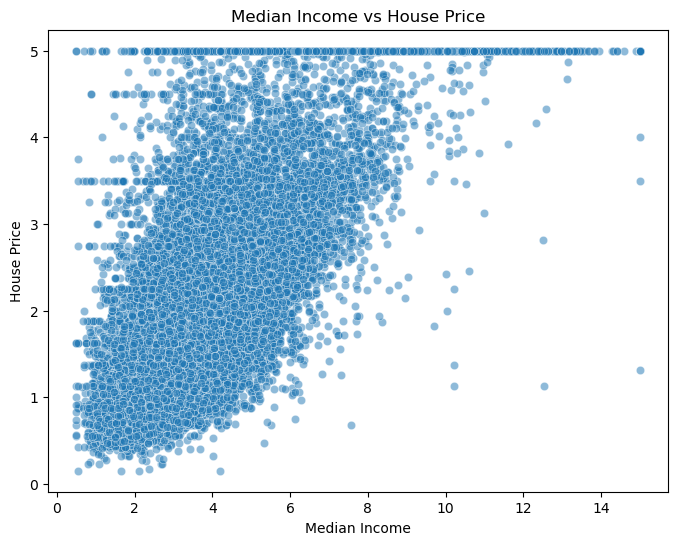

In [47]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='MedInc', y='price', data=df, alpha=0.5)  
plt.title('Median Income vs House Price')
plt.xlabel('Median Income')
plt.ylabel('House Price')
plt.show()


In [48]:
print("\nCorrelation with price:\n",df.corr()['price'].sort_values())


Correlation with price:
 Latitude     -0.144160
AveBedrms    -0.046701
Longitude    -0.045967
Population   -0.024650
AveOccup     -0.023737
HouseAge      0.105623
AveRooms      0.151948
MedInc        0.688075
price         1.000000
Name: price, dtype: float64


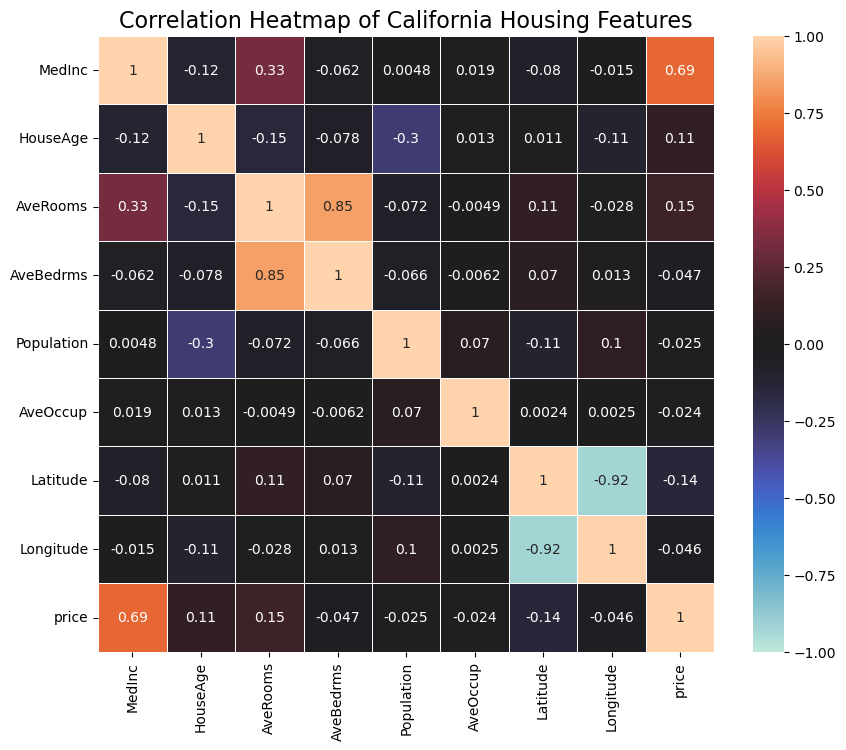

In [49]:
corr_matrix = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix,
           annot=True,
           vmin=-1,vmax=1,
           center=0,
           square=True,
           linewidth=0.5)
plt.title('Correlation Heatmap of California Housing Features',fontsize=16)
plt.show()

In [50]:
# Step 1: Define Independent (X) and Dependent (Y) Variables
X = df[['MedInc']]
Y = df['price']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [51]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(f"\nLinear Equation: price = {model.coef_[0]:.2f}*MedInc + {model.intercept_:.2f}")


Linear Equation: price = 0.42*MedInc + 0.44


In [54]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mean_squared_error(Y_test,y_pred))
r2 = r2_score(Y_test,y_pred)
print(f"\nMAE:{mae:.2f}$100k")
print(f"\nRMSE:{rmse:.2f}$100k")
print(f"\nR2:{r2:.2f}")


MAE:0.63$100k

RMSE:0.84$100k

R2:0.46


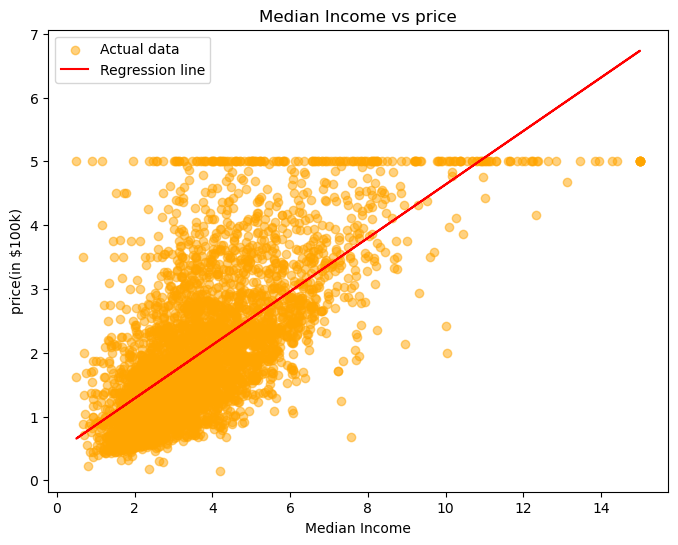

In [58]:
# Step 8: Plot the regression line
plt.figure(figsize=(8,6))
plt.scatter(X_test,Y_test,color='orange',label='Actual data',alpha=0.5)
plt.plot(X_test,y_pred,color='red',label='Regression line')
plt.xlabel('Median Income')
plt.ylabel('price(in $100k)')
plt.title('Median Income vs price')
plt.legend()
plt.show()

In [59]:
df=pd.read_csv('House_Price_India.csv')
df

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000
